## <span style="color:orange">Techniques: </span>
- **Random Forest**

### <span style="color:purple">**Dataset: Wine Quality Prediction !**</span>

### <span style="color:red">Problem: **Classification**</span>

***

### <span style="color:cyan">Step: 00</span>: (Import Libraries)

In [68]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

In [69]:
# import Dataset !

df = pd.read_csv('red_wine.csv')
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
779,7.1,0.52,0.03,2.6,0.076,21.0,92.0,0.99745,3.50,0.60,9.8,5
1512,6.4,0.79,0.04,2.2,0.061,11.0,17.0,0.99588,3.53,0.65,10.4,6
895,7.1,0.59,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,6
291,11.0,0.20,0.48,2.0,0.343,6.0,18.0,0.99790,3.30,0.71,10.5,5
1182,10.2,0.40,0.40,2.5,0.068,41.0,54.0,0.99754,3.38,0.86,10.5,6


***

##### Missing Values

In [70]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

There is no Null Values


In [71]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Numerical Features

In [72]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_features))
df[numerical_features].head()

The length of Numerical_values is : 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Discrete Variables 

In [73]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature

The Discrete feature is : 1


['quality']

#### Continous Variables

In [74]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature]

print("The Continous feature is :",len(continous_Feature))
continous_Feature

The Continous feature is : 11


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [75]:
df[continous_Feature].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


#### Categorical Features

In [76]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

0


[]

In [77]:
df[categorical_feature].head()

""
0
1
2
3
4


***

In [78]:
df.shape

(1599, 12)

In [79]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [81]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [82]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [83]:
X = df.drop(['quality'], axis=1)
y = df[['quality']]

In [84]:
X.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
993,7.1,0.340,0.28,2.00,0.082,31.0,68.0,0.99694,3.45,0.48,9.4
999,6.4,0.690,0.00,1.65,0.055,7.0,12.0,0.99162,3.47,0.53,12.9
1508,7.1,0.270,0.60,2.10,0.074,17.0,25.0,0.99814,3.38,0.72,10.6
1011,8.9,0.320,0.31,2.00,0.088,12.0,19.0,0.99570,3.17,0.55,10.4
302,8.3,0.705,0.12,2.60,0.092,12.0,28.0,0.99940,3.51,0.72,10.0


In [85]:
y.sample(5)

,quality
26,5
773,6
440,8
1511,5
1138,5


In [86]:
y['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

---

### <span style="color:cyan">Step: 02</span>: Data Engineering

#### Normalization (Plotting)

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


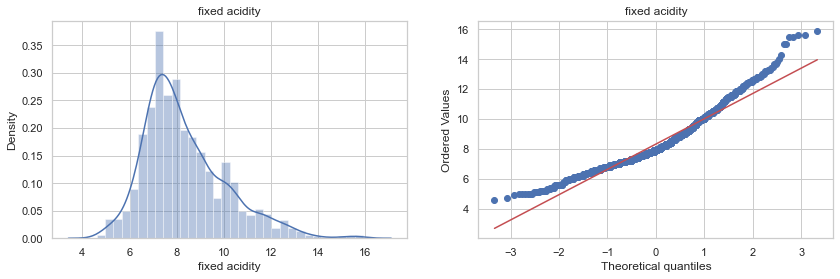

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


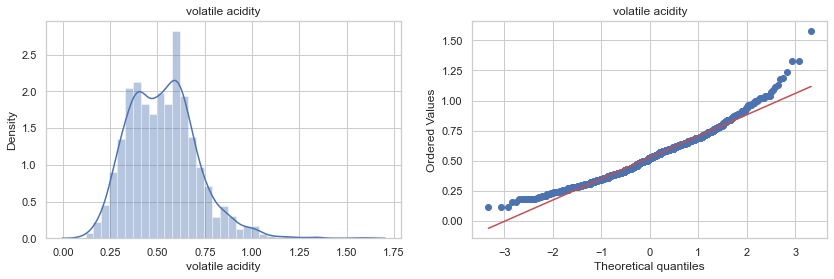

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


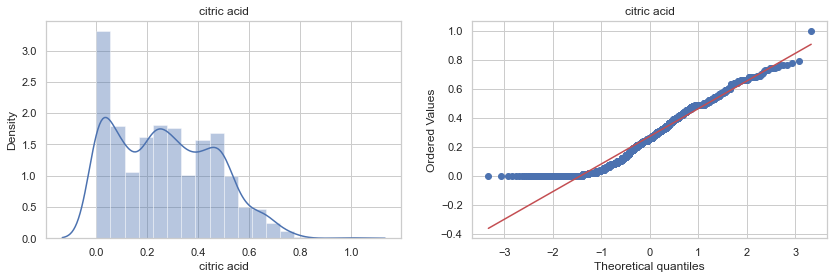

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


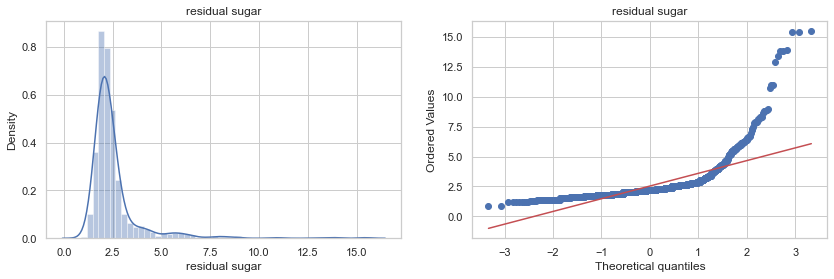

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


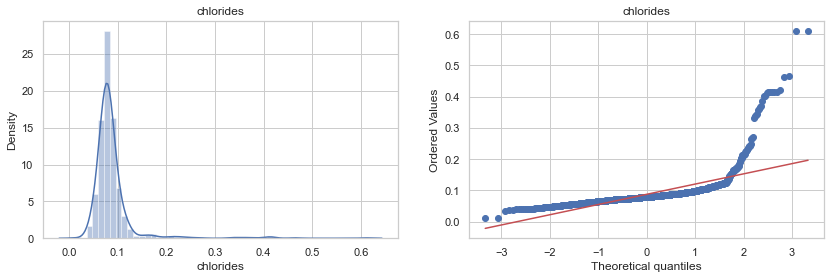

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


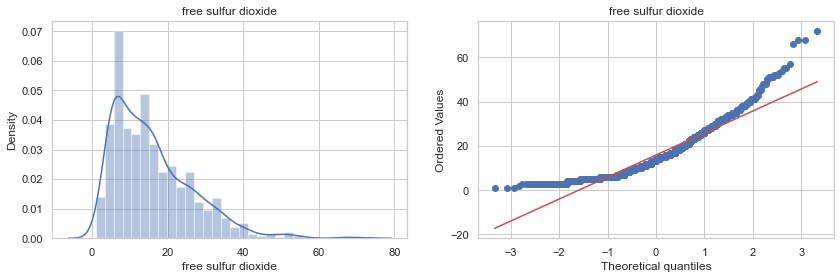

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


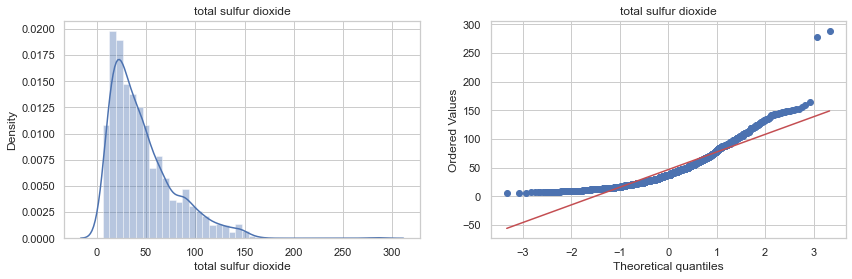

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


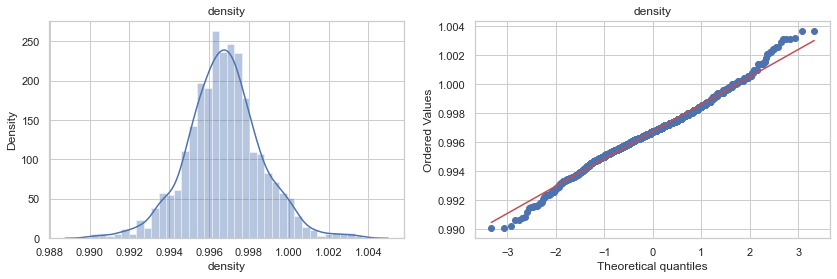

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


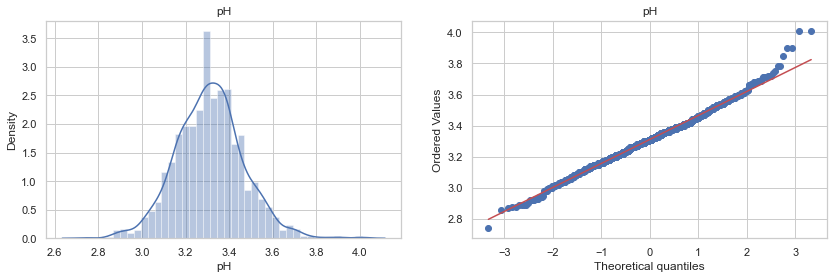

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


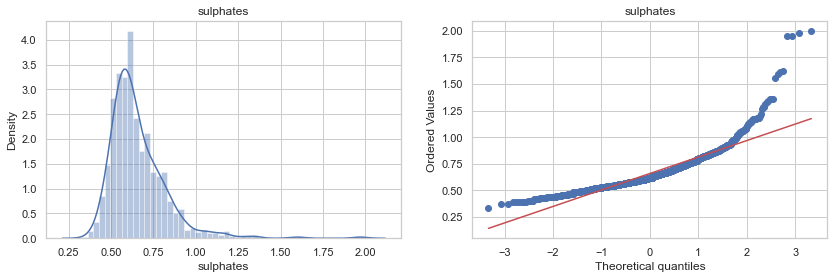

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


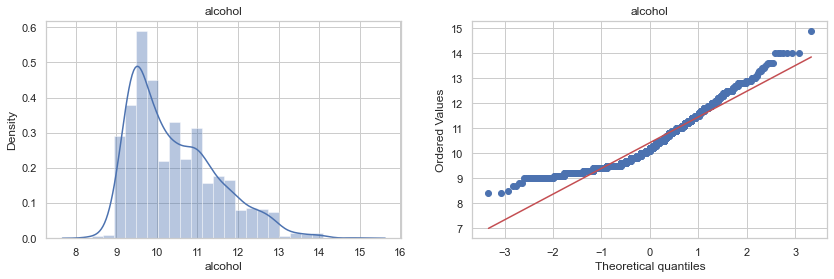

In [87]:
# Plotting the distplots without any transformation

for col in X.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [88]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [89]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

***

### Data Normalization

In [90]:
# transformation !

feature = X.columns
scaling = MinMaxScaler()
df[feature] = scaling.fit_transform(df[feature])
X = df[feature]
X.head(3)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385


***

### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

In [91]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [92]:
print("Before Cleaning:", df.shape)

Before Cleaning: (1599, 12)


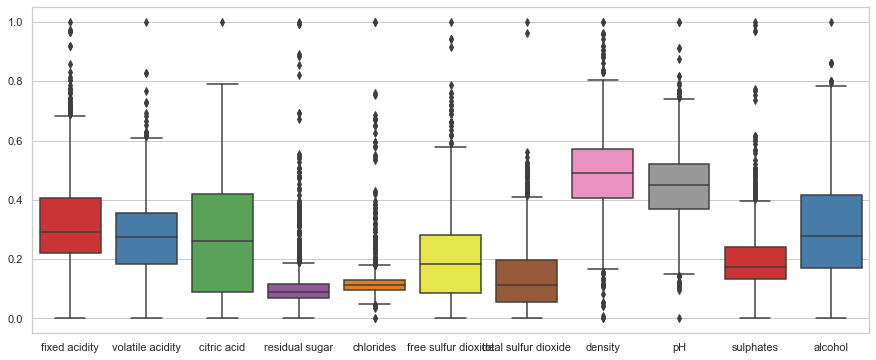

In [93]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=X,
            palette="Set1")
plt.show()            

***

Before Removing (fixed acidity) outliers


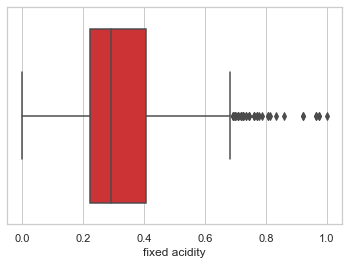

After Removing (fixed acidity) outliers


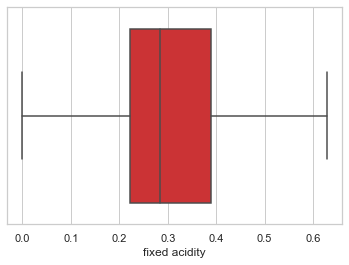

In [94]:
# fixed acidity

print("Before Removing (fixed acidity) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="fixed acidity",
            palette="Set1")
plt.show()            

df = df[df['fixed acidity']<0.63] 


print("After Removing (fixed acidity) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="fixed acidity",
            palette="Set1")
plt.show()     

In [95]:
print("Shape:", df.shape)

Shape: (1518, 12)


***

Before Removing (volatile acidity) outliers


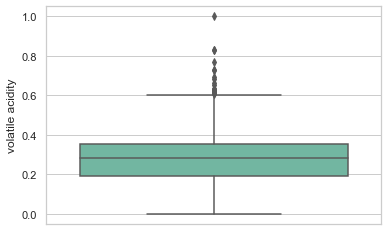

After Removing (volatile acidity) outliers


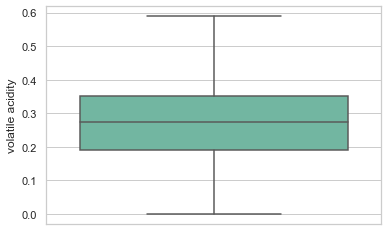

In [96]:
# volatile acidity

print("Before Removing (volatile acidity) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="volatile acidity",
            palette="Set2")
plt.show()            

df = df[df['volatile acidity']<0.59] 


print("After Removing (volatile acidity) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="volatile acidity",
            palette="Set2")
plt.show()            

In [97]:
print("Shape:", df.shape)

Shape: (1494, 12)


***

Before Removing (citric acid) outliers


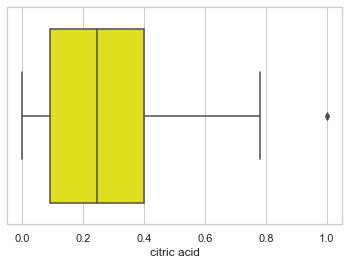

After Removing (citric acid) outliers


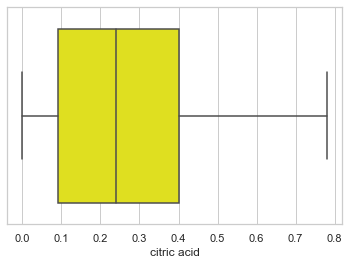

In [98]:
# citric acid

print("Before Removing (citric acid) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="citric acid",
            color="yellow")
plt.show()  

df = df[df['citric acid']<0.98]


print("After Removing (citric acid) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="citric acid",
            color="yellow")
plt.show()         

In [99]:
print("Shape:", df.shape)

Shape: (1493, 12)


***

In [100]:
# # residual sugar

# print("Before Removing (residual sugar) outliers")
# sns.set_theme(style="whitegrid", color_codes=True)
# sns.boxplot(data=df,
#             y="residual sugar",
#             color="green")
# plt.show()            

# df = df[df['residual sugar']<0.155]


# print("After Removing (residual sugar) outliers")
# sns.set_theme(style="whitegrid", color_codes=True)
# sns.boxplot(data=df,
#             y="residual sugar",
#             color="green")
# plt.show()

In [101]:
# print("Shape:", df.shape)

***

In [102]:
# # chlorides

# print("Before Removing (chlorides) outliers")
# sns.set_theme(style="whitegrid", color_codes=True)
# sns.boxplot(data=df,
#             x="chlorides",
#             color="purple")
# plt.show()

# df = df[df['chlorides']>0.07]
# df = df[df['chlorides']<0.16]


# print("After Removing (chlorides) outliers")
# sns.set_theme(style="whitegrid", color_codes=True)
# sns.boxplot(data=df,
#             x="chlorides",
#             color="purple")
# plt.show()            

In [103]:
# print("Shape:", df.shape)

***

Before Removing (free sulfur dioxide) outliers


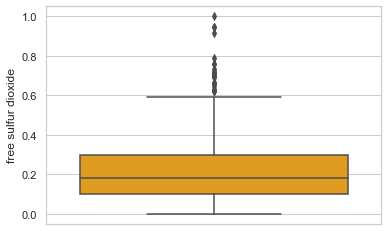

After Removing (free sulfur dioxide) outliers


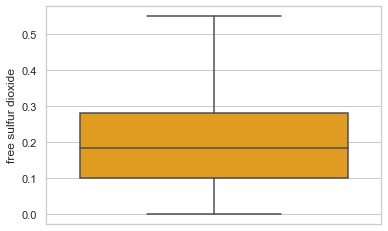

In [104]:
# free sulfur dioxide

print("Before Removing (free sulfur dioxide) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="free sulfur dioxide",
            color="orange")
plt.show()            

df = df[df['free sulfur dioxide']<0.55]


print("After Removing (free sulfur dioxide) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="free sulfur dioxide",
            color="orange")
plt.show()  

In [105]:
print("Shape:", df.shape)

Shape: (1454, 12)


***

In [106]:
# # total sulfur dioxide

# print("Before Removing (total sulfur dioxide) outliers")
# sns.set_theme(style="whitegrid", color_codes=True)
# sns.boxplot(data=df,
#             x="total sulfur dioxide",
#             color="brown")
# plt.show()

# df = df[df['total sulfur dioxide']<0.31]


# print("After Removing (total sulfur dioxide) outliers")
# sns.set_theme(style="whitegrid", color_codes=True)
# sns.boxplot(data=df,
#             x="total sulfur dioxide",
#             color="brown")
# plt.show()            

In [107]:
# print("Shape:", df.shape)

***

Before Removing (density) outliers


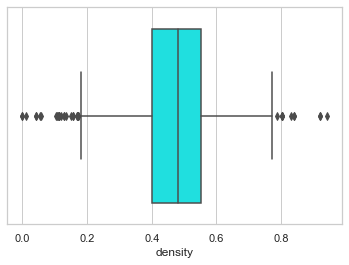

After Removing (density) outliers


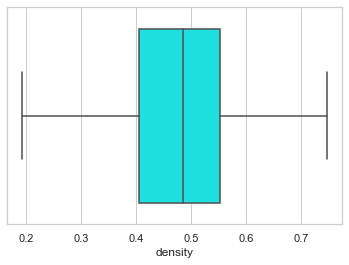

In [108]:
# density                 

print("Before Removing (density) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="density",
            color="cyan")
plt.show()            

df = df[df['density']<0.75]
df = df[df['density']>0.19]


print("After Removing (density) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="density",
            color="cyan")
plt.show()            

In [109]:
print("Shape:", df.shape)

Shape: (1403, 12)


***

Before Removing (pH) outliers


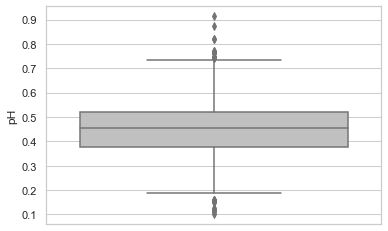

After Removing (pH) outliers


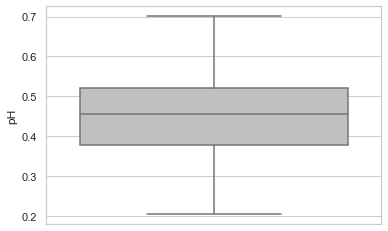

In [110]:
# pH                                       

print("Before Removing (pH) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="pH",
            color="silver")
plt.show()     

df = df[df['pH']<0.72]
df = df[df['pH']>0.2]

print("After Removing (pH) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="pH",
            color="silver")
plt.show()            

In [111]:
print("Shape:", df.shape)

Shape: (1368, 12)


***

Before Removing (sulphates) outliers


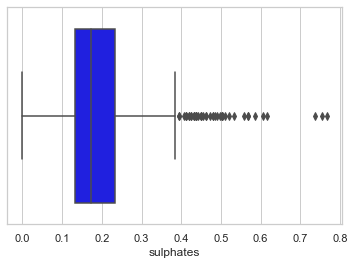

After Removing (sulphates) outliers


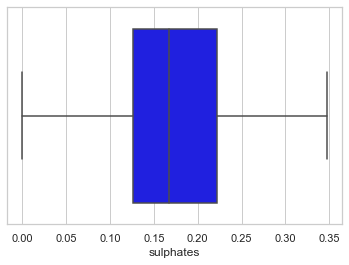

In [112]:
# sulphates                                           

print("Before Removing (sulphates) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="sulphates",
            color="blue")
plt.show()            

df = df[df['sulphates']<0.35]


print("After Removing (sulphates) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="sulphates",
            color="blue")
plt.show()            

In [113]:
print("Shape:", df.shape)

Shape: (1295, 12)


***

Before Removing (alcohol) outliers


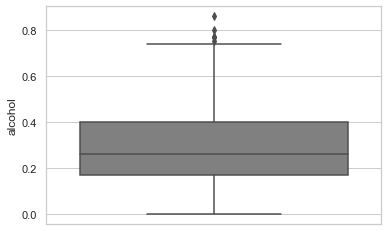

After Removing (alcohol) outliers


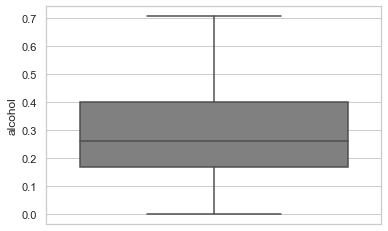

In [114]:
# alcohol                                       

print("Before Removing (alcohol) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="alcohol",
            color="gray")
plt.show()  

df = df[df['alcohol']<0.72]


print("After Removing (alcohol) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            y="alcohol",
            color="gray")
plt.show()

In [115]:
print("Shape:", df.shape)

Shape: (1288, 12)


***

In [116]:
print("After Cleaning:", df.shape)

After Cleaning: (1288, 12)


After Removing Outliers


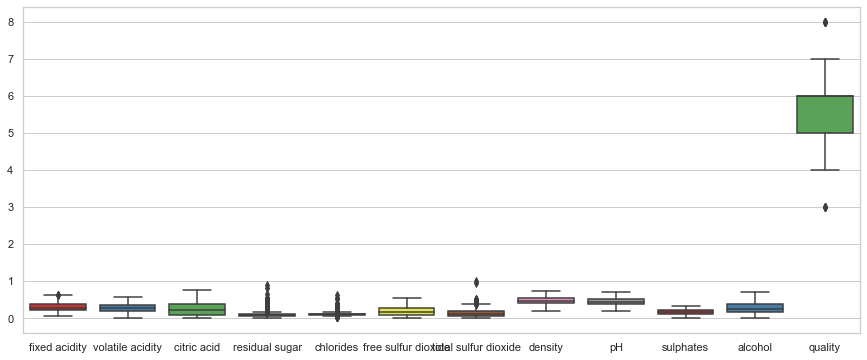

In [117]:
print("After Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            palette="Set1")
plt.show()            

***

## **Model Building**

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***

### <span style="color:cyan">Step: 05</span>: Apply Techniques !

In [119]:
# DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model

DecisionTreeClassifier()

In [120]:
# RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

C:\Users\fahad\AppData\Local\Temp\ipykernel_9776\261485189.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier().fit(X_train, y_train)


RandomForestClassifier()

In [121]:
# GaussianNaiveBayes

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [122]:
# KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)
knn_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [123]:
# LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
lr_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### <span style="color:cyan">Step: 05</span>: Evaluate or Test Model Accuracy

In [124]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

# Decision tree
dt_score = np.round(accuracy_score(y_test, y_pred_dt)*100, 3)
print("Decision tree:", dt_score)

Decision tree: 55.625


In [125]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

# Random forest
rf_score = np.round(accuracy_score(y_test, y_pred_rf)*100, 3)
print("Random forest:", rf_score)

Random forest: 65.312


In [126]:
y_pred_gnb = gnb_model.predict(X_test)
y_pred_gnb

# Gussian Naive Bays
gnb_score = np.round(accuracy_score(y_test, y_pred_gnb)*100, 3)
print("GussianNB:", gnb_score)

GussianNB: 54.688


In [127]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

# K_Nearest Neighbours 
knn_score = np.round(accuracy_score(y_test, y_pred_knn)*100, 3)
print("KNN:", knn_score)

KNN: 53.125


In [128]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

# Logistic Regression 
lr_score = np.round(accuracy_score(y_test, y_pred_lr)*100, 3)
print("Logistic Regression:", lr_score)

Logistic Regression: 56.25


###  Compare the Results of Techniques !

In [129]:
data={'Decision tree'            :[dt_score],
      'Random Forest'            :[rf_score],
      'Gaussian_NB'              :[gnb_score],
      'KNN'                      :[knn_score],
      'Logistic Regression'      :[lr_score]
}

In [130]:
Evaluation = pd.DataFrame(data, index=['Score'])
Evaluation

,Decision tree,Random Forest,Gaussian_NB,KNN,Logistic Regression
Score,55.625,65.312,54.688,53.125,56.25


***

### **Apply Cross Validation**

In [131]:
rf_validate = np.round(cross_val_score(rf_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of RF:", rf_validate)

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

After cross validation of RF: 56.224


***

In [132]:
data={'Random Forest'            :[rf_score],
      'Cross-validate RF'        :[rf_validate]
}

In [133]:
Evaluation = pd.DataFrame(data, index=['Score'])
Evaluation

,Random Forest,Cross-validate RF
Score,65.312,56.224


***

***

***